In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_Ind = pd.read_excel("Climate_Risk.xlsx",sheet_name = "India")
data_Ind

,Indicator,Value,Year
0,Cooling Degree Days,4761.81,2020
1,Coastal protection,97.41,2020
2,Heating Degree Days,936.43,2020
3,Heat Index 35,56.30,2020
4,Standardised Precipitation-Evapotranspiration ...,0.80,2021
...,...,...,...
60,"Patent applications, residents",26267.00,2021
61,Control of Corruption: Estimate,-0.32,2022
62,Political Stability and Absence of Violence/Te...,-0.57,2022
63,Rule of Law: Estimate,0.11,2022


In [3]:
data_Ind.shape

(65, 3)

In [4]:
data_US = pd.read_excel("Climate_Risk.xlsx",sheet_name = "US")
data_US

,Indicator,Value,Year
0,Cooling Degree Days,1195.3,2020
1,Coastal protection,72.28,2020
2,Heating Degree Days,6469.1,2020
3,Heat Index 35,1.29,2020
4,Standardised Precipitation-Evapotranspiration ...,-0.23,2021
...,...,...,...
60,"Patent applications, residents",262244,2021
61,Control of Corruption: Estimate,1.1,2022
62,Political Stability and Absence of Violence/Te...,-0.04,2022
63,Rule of Law: Estimate,1.37,2022


In [5]:
data_US.shape

(65, 3)

In [6]:
data_Ch = pd.read_excel("Climate_Risk.xlsx",sheet_name = "China")
data_Ch

,Indicator,Value,Year
0,Cooling Degree Days,955.04,2020
1,Coastal protection,71.67,2020
2,Heating Degree Days,8040.49,2020
3,Heat Index 35,3.96,2020
4,Standardised Precipitation-Evapotranspiration ...,0.72,2021
...,...,...,...
60,"Patent applications, residents",1.43 million,2021
61,Control of Corruption: Estimate,0.02,2022
62,Political Stability and Absence of Violence/Te...,-0.44,2022
63,Rule of Law: Estimate,-0.04,2022


In [7]:
data_Ch.shape

(65, 3)

C:\Users\psama\AppData\Local\Temp\ipykernel_5900\3417090250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = country_name
C:\Users\psama\AppData\Local\Temp\ipykernel_5900\3417090250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = country_name
C:\Users\psama\AppData\Local\Temp\ipykernel_5900\3417090250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

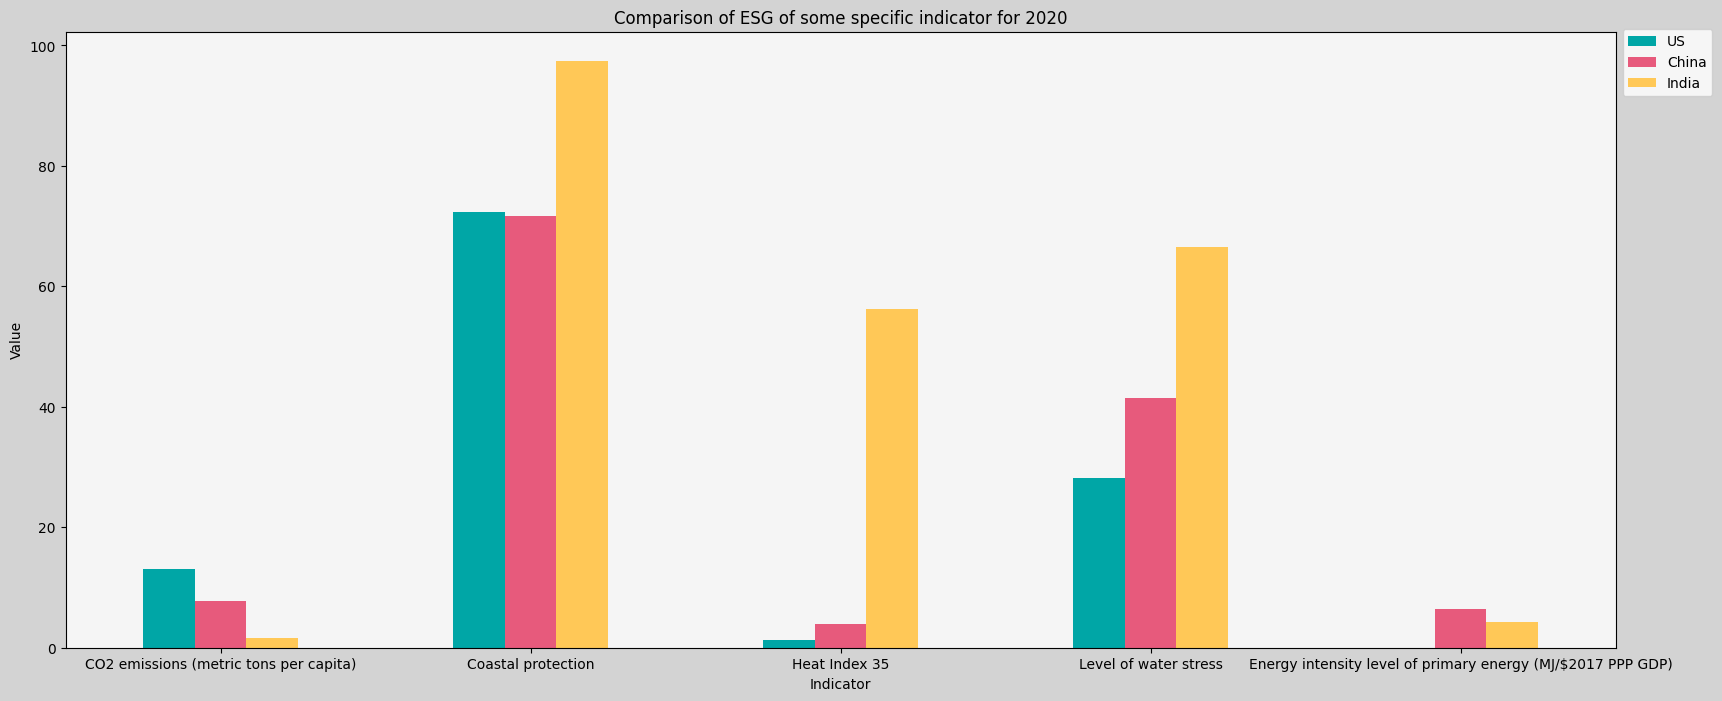

In [8]:
# Function to filter data for specific indicators and year
def filter_indicator_year_data(df, indicators, year, country_name):
    df = df[(df['Year'] == year) & (df['Indicator'].isin(indicators))]
    df['Country'] = country_name
    return df.pivot(index='Indicator', columns='Country', values='Value')

# Specify the indicators and year
indicators = [
    'CO2 emissions (metric tons per capita)',
    'Coastal protection','Heat Index 35',
    'Level of water stress',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'
]
year = 2020

# Filter data for the specified indicators and year
us_data = filter_indicator_year_data(data_US, indicators, year, 'US')
china_data = filter_indicator_year_data(data_Ch, indicators, year, 'China')
india_data = filter_indicator_year_data(data_Ind, indicators, year, 'India')

# Combine the data into a single DataFrame for comparison
combined_df = pd.concat([us_data, china_data, india_data], axis=1)

# Plotting the indicators for comparison with countries in different colors
fig, ax = plt.subplots(figsize=(20, 8))
fig.patch.set_facecolor('lightgrey')  # Change the background color of the entire figure
ax.set_facecolor('whitesmoke')
colors = ['#00a6a6', '#e75a7c', '#ffc857'] 
combined_df.plot(kind='bar', ax=ax,color=colors) 
plt.xlabel('Indicator')
plt.ylabel('Value')
plt.xticks(rotation=0, fontsize=10)
plt.title(f'Comparison of ESG of some specific indicator for {year}')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.95))
plt.show()

C:\Users\psama\AppData\Local\Temp\ipykernel_5900\374900288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = country_name
C:\Users\psama\AppData\Local\Temp\ipykernel_5900\374900288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = country_name
C:\Users\psama\AppData\Local\Temp\ipykernel_5900\374900288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

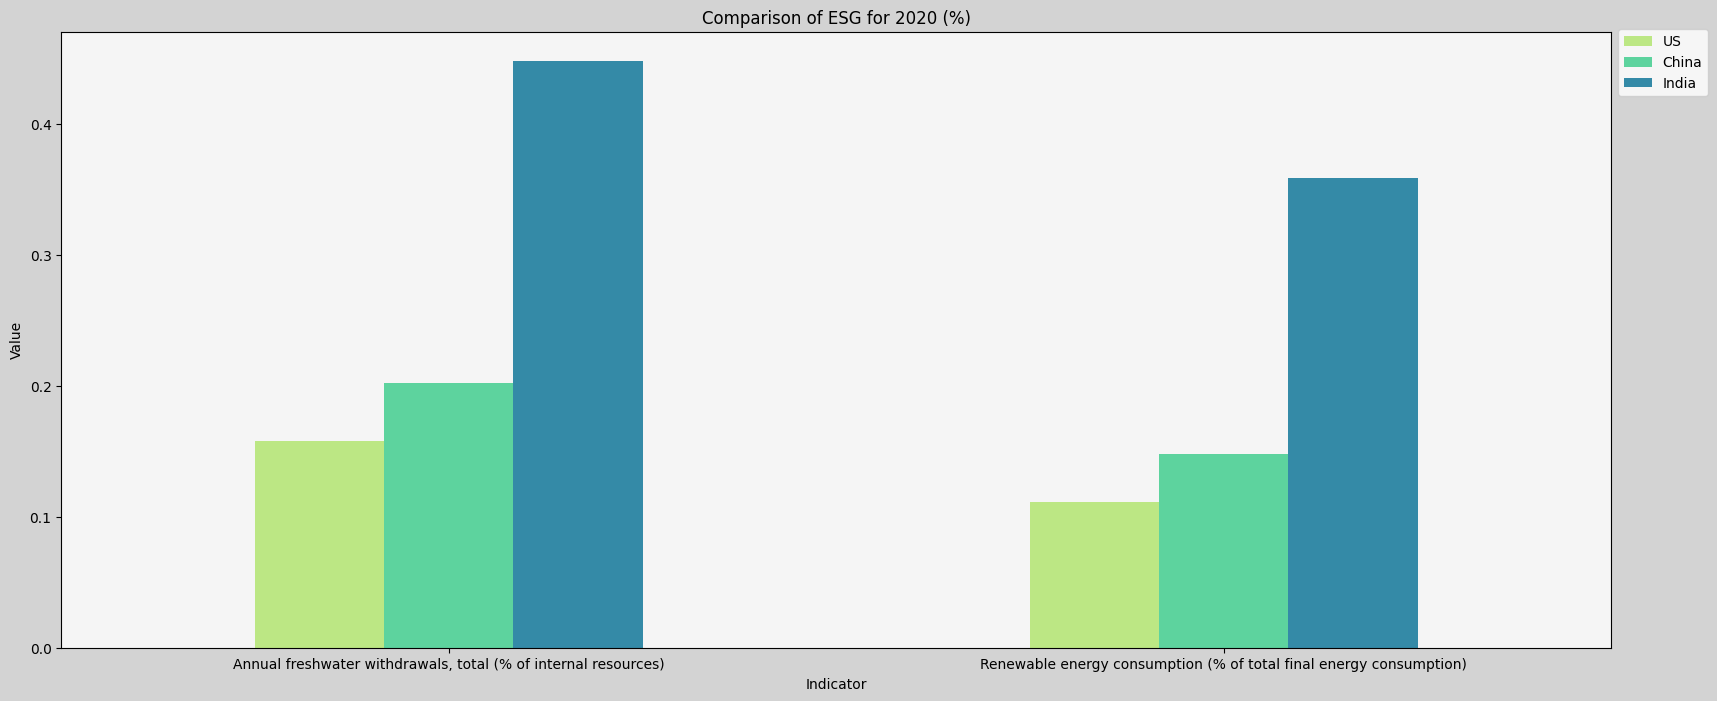

In [9]:
# Function to filter data for specific indicators and year
def filter_indicator_year_data(df, indicators, year, country_name):
    df = df[(df['Year'] == year) & (df['Indicator'].isin(indicators))]
    df['Country'] = country_name
    return df.pivot(index='Indicator', columns='Country', values='Value')
    
indicators = [
    'Annual freshwater withdrawals, total (% of internal resources)',
    'Renewable energy consumption (% of total final energy consumption)'
    
]
year = 2020

# Filter data for the specified indicators and year
us_data = filter_indicator_year_data(data_US, indicators, year, 'US')
china_data = filter_indicator_year_data(data_Ch, indicators, year, 'China')
india_data = filter_indicator_year_data(data_Ind, indicators, year, 'India')

# Combine the data into a single DataFrame for comparison
combined_df = pd.concat([us_data, china_data, india_data], axis=1)

# Plotting the indicators for comparison with countries in different colors
fig, ax = plt.subplots(figsize=(20, 8))
fig.patch.set_facecolor('lightgrey')  # Change the background color of the entire figure
ax.set_facecolor('whitesmoke')
colors = ['#bce784', '#5dd39e', '#348aa7'] 
combined_df.plot(kind='bar', ax=ax,color=colors) 
plt.xlabel('Indicator')
plt.ylabel('Value')
plt.xticks(rotation=0,fontsize=10)
plt.title(f'Comparison of ESG for {year} (%)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.95))
plt.show()

C:\Users\psama\AppData\Local\Temp\ipykernel_5900\4252757872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = country_name
C:\Users\psama\AppData\Local\Temp\ipykernel_5900\4252757872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = country_name
C:\Users\psama\AppData\Local\Temp\ipykernel_5900\4252757872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

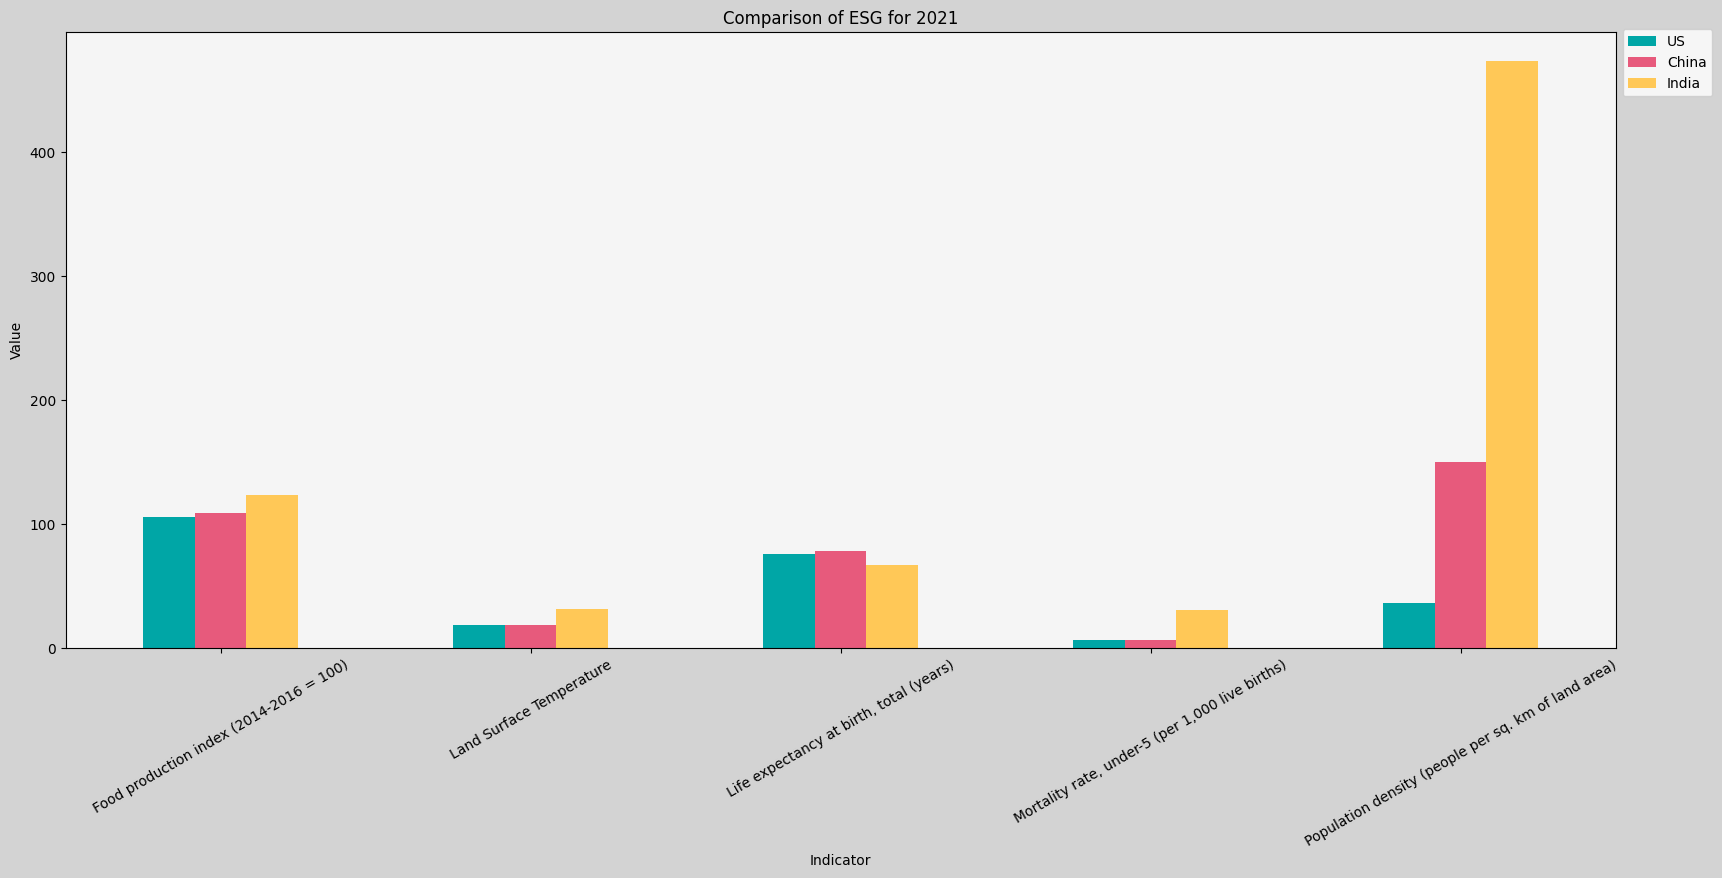

In [10]:
# Function to filter data for specific indicators and year
def filter_indicator_year_data(df, indicators, year, country_name):
    df = df[(df['Year'] == year) & (df['Indicator'].isin(indicators))]
    df['Country'] = country_name
    return df.pivot(index='Indicator', columns='Country', values='Value')
    
indicators = [
    'Land Surface Temperature',
    'Population density (people per sq. km of land area)',
    'Food production index (2014-2016 = 100)',
    'Life expectancy at birth, total (years)',
    'Mortality rate, under-5 (per 1,000 live births)'
]
year = 2021

# Filter data for the specified indicators and year
us_data = filter_indicator_year_data(data_US, indicators, year, 'US')
china_data = filter_indicator_year_data(data_Ch, indicators, year, 'China')
india_data = filter_indicator_year_data(data_Ind, indicators, year, 'India')

# Combine the data into a single DataFrame for comparison
combined_df = pd.concat([us_data, china_data, india_data], axis=1)

# Plotting the indicators for comparison with countries in different colors
fig, ax = plt.subplots(figsize=(20, 8))
fig.patch.set_facecolor('lightgrey')  # Change the background color of the entire figure
ax.set_facecolor('whitesmoke')
colors = ['#00a6a6', '#e75a7c', '#ffc857'] 
combined_df.plot(kind='bar', ax=ax,color=colors)  
plt.xlabel('Indicator')
plt.ylabel('Value')
plt.xticks(rotation=30,fontsize=10)
plt.title(f'Comparison of ESG for {year}')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.95))
plt.show()

C:\Users\psama\AppData\Local\Temp\ipykernel_5900\955790668.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = country_name
C:\Users\psama\AppData\Local\Temp\ipykernel_5900\955790668.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = country_name
C:\Users\psama\AppData\Local\Temp\ipykernel_5900\955790668.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

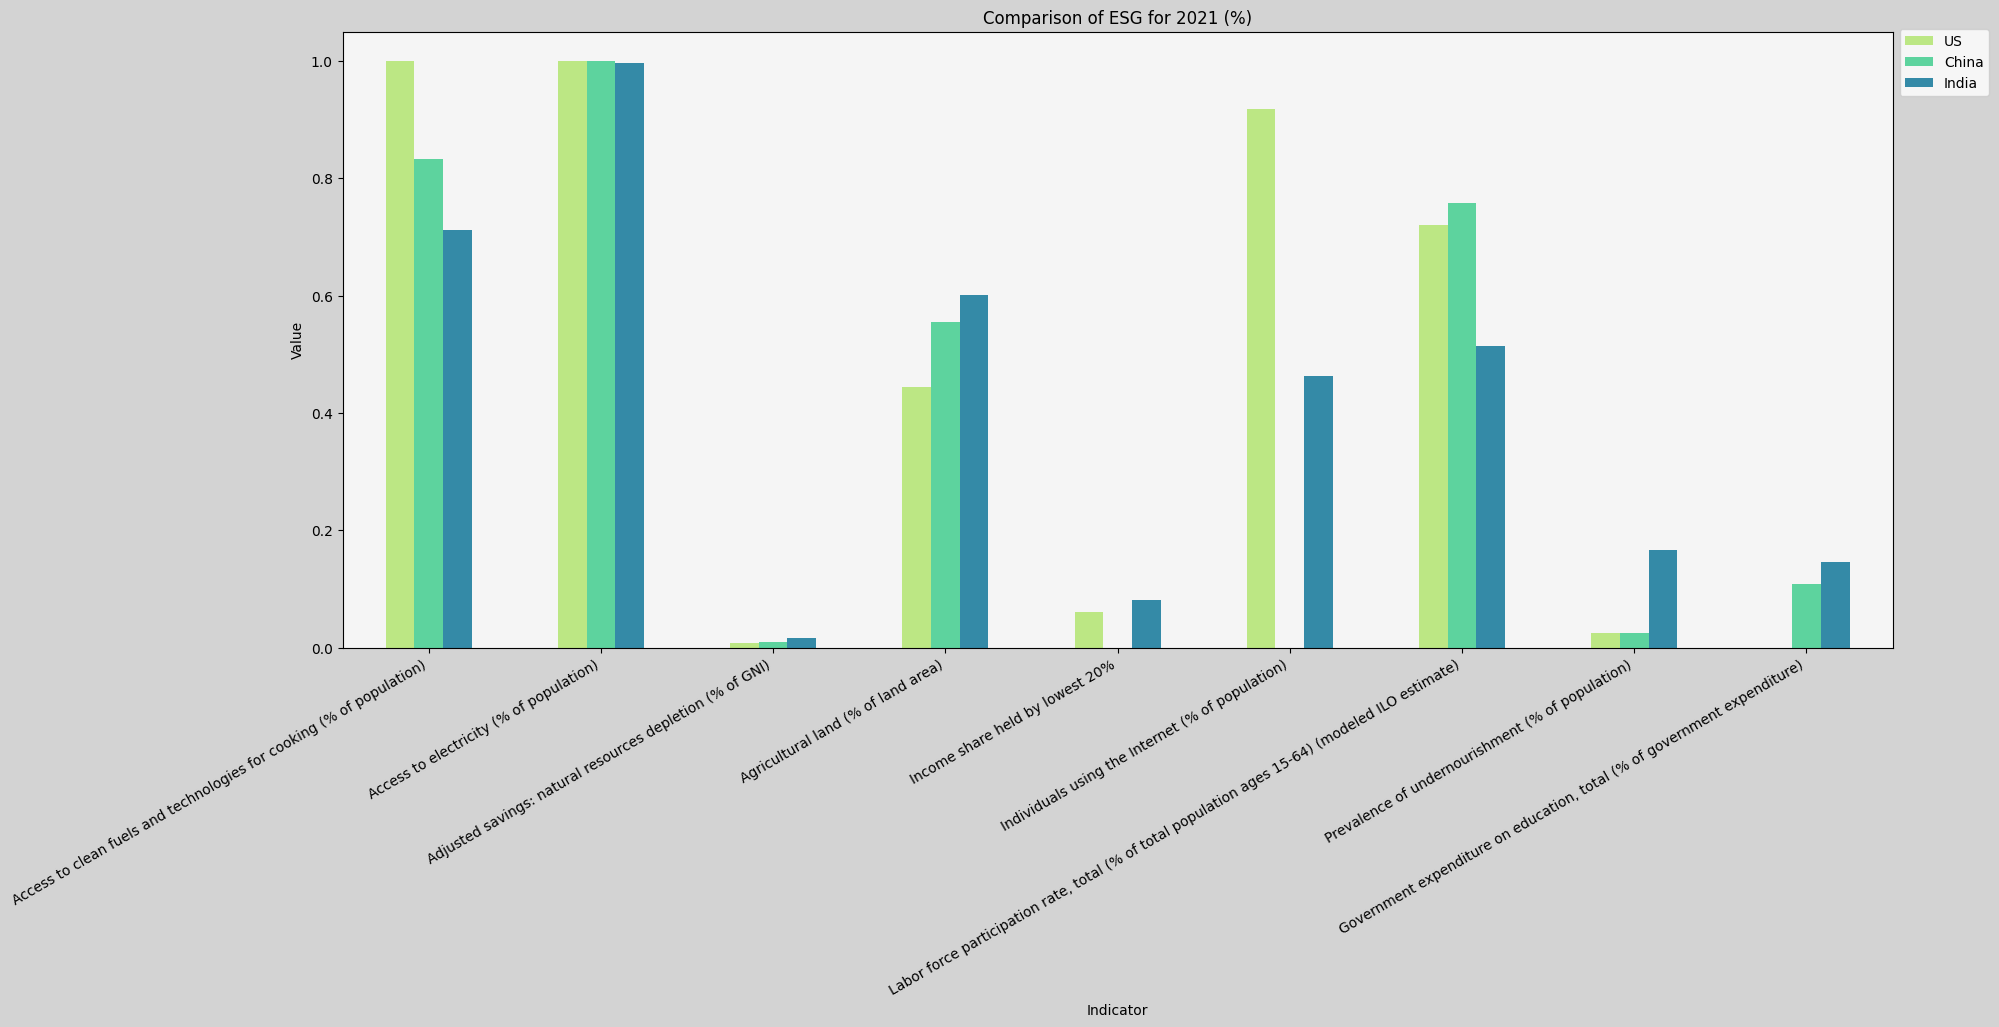

In [11]:
# Function to filter data for specific indicators and year
def filter_indicator_year_data(df, indicators, year, country_name):
    df = df[(df['Year'] == year) & (df['Indicator'].isin(indicators))]
    df['Country'] = country_name
    return df.pivot(index='Indicator', columns='Country', values='Value')
    
indicators = [
    'Individuals using the Internet (% of population)',
    'Poverty headcount ratio at national poverty lines (% of population)',
    'Income share held by lowest 20%','Prevalence of undernourishment (% of population)',
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)',
    'Government expenditure on education, total (% of government expenditure)',
    'Access to electricity (% of population)',
    'Access to clean fuels and technologies for cooking (% of population)',
    'Adjusted savings: natural resources depletion (% of GNI)',
    'Agricultural land (% of land area)'
]
year = 2021

# Filter data for the specified indicators and year
us_data = filter_indicator_year_data(data_US, indicators, year, 'US')
china_data = filter_indicator_year_data(data_Ch, indicators, year, 'China')
india_data = filter_indicator_year_data(data_Ind, indicators, year, 'India')

# Combine the data into a single DataFrame for comparison
combined_df = pd.concat([us_data, china_data, india_data], axis=1)

# Plotting the indicators for comparison with countries in different colors
fig, ax = plt.subplots(figsize=(20, 8))
fig.patch.set_facecolor('lightgrey')  # Change the background color of the entire figure
ax.set_facecolor('whitesmoke')
colors = ['#bce784', '#5dd39e', '#348aa7'] 
combined_df.plot(kind='bar', ax=ax,color=colors) 
plt.xlabel('Indicator')
plt.ylabel('Value')
plt.xticks(rotation=30,ha = 'right', fontsize=10)
plt.title(f'Comparison of ESG for {year} (%)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.95))
plt.show()

C:\Users\psama\AppData\Local\Temp\ipykernel_5900\1590814692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = country_name
C:\Users\psama\AppData\Local\Temp\ipykernel_5900\1590814692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = country_name
C:\Users\psama\AppData\Local\Temp\ipykernel_5900\1590814692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

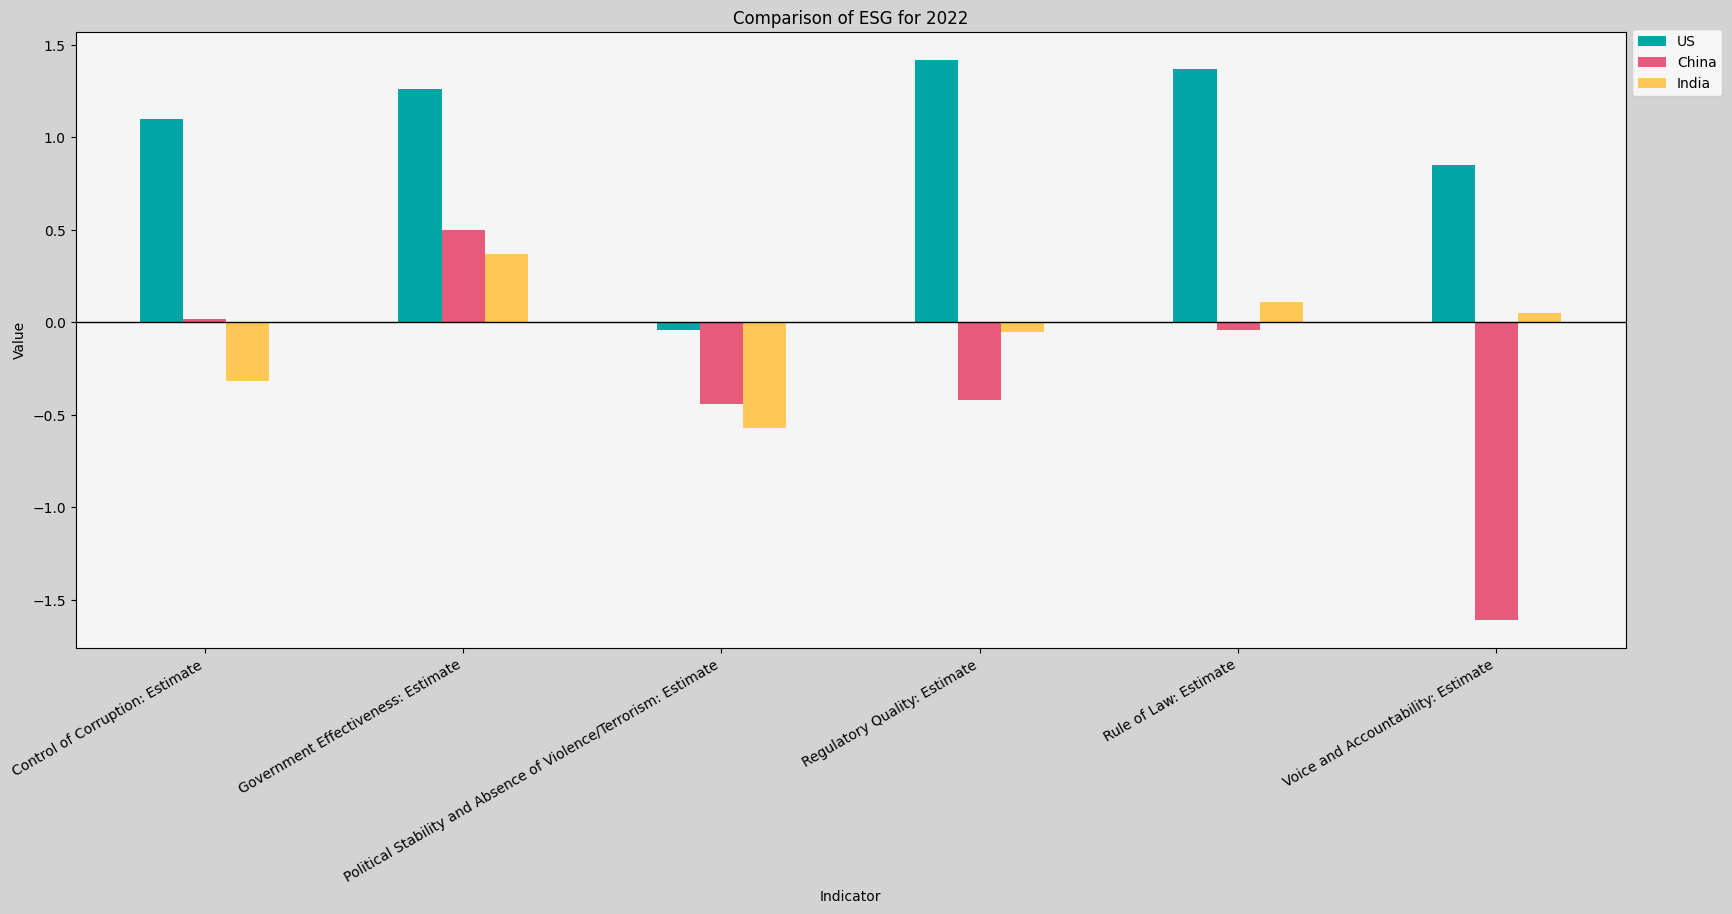

In [12]:
# Function to filter data for specific indicators and year
def filter_indicator_year_data(df, indicators, year, country_name):
    df = df[(df['Year'] == year) & (df['Indicator'].isin(indicators))]
    df['Country'] = country_name
    return df.pivot(index='Indicator', columns='Country', values='Value')
    
indicators = [
    'Rule of Law: Estimate','Political Stability and Absence of Violence/Terrorism: Estimate',
    'Control of Corruption: Estimate','Voice and Accountability: Estimate',
    'Regulatory Quality: Estimate','Government Effectiveness: Estimate'
]
year = 2022

# Filter data for the specified indicators and year
us_data = filter_indicator_year_data(data_US, indicators, year, 'US')
china_data = filter_indicator_year_data(data_Ch, indicators, year, 'China')
india_data = filter_indicator_year_data(data_Ind, indicators, year, 'India')

# Combine the data into a single DataFrame for comparison
combined_df = pd.concat([us_data, china_data, india_data], axis=1)

# Plotting the indicators for comparison with countries in different colors
fig, ax = plt.subplots(figsize=(20, 8))
fig.patch.set_facecolor('lightgrey')  # Change the background color of the entire figure
ax.set_facecolor('whitesmoke')
colors = ['#00a6a6', '#e75a7c', '#ffc857'] 
combined_df.plot(kind='bar', ax=ax,color=colors)  
plt.axhline(0, color='black', linewidth=1)  # Add a line at y=0
plt.xlabel('Indicator')
plt.ylabel('Value')
plt.xticks(rotation=30, ha = 'right',fontsize=10)
plt.title(f'Comparison of ESG for {year}')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.95))
plt.show()

C:\Users\psama\AppData\Local\Temp\ipykernel_5900\3793294078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = country_name
C:\Users\psama\AppData\Local\Temp\ipykernel_5900\3793294078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = country_name
C:\Users\psama\AppData\Local\Temp\ipykernel_5900\3793294078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

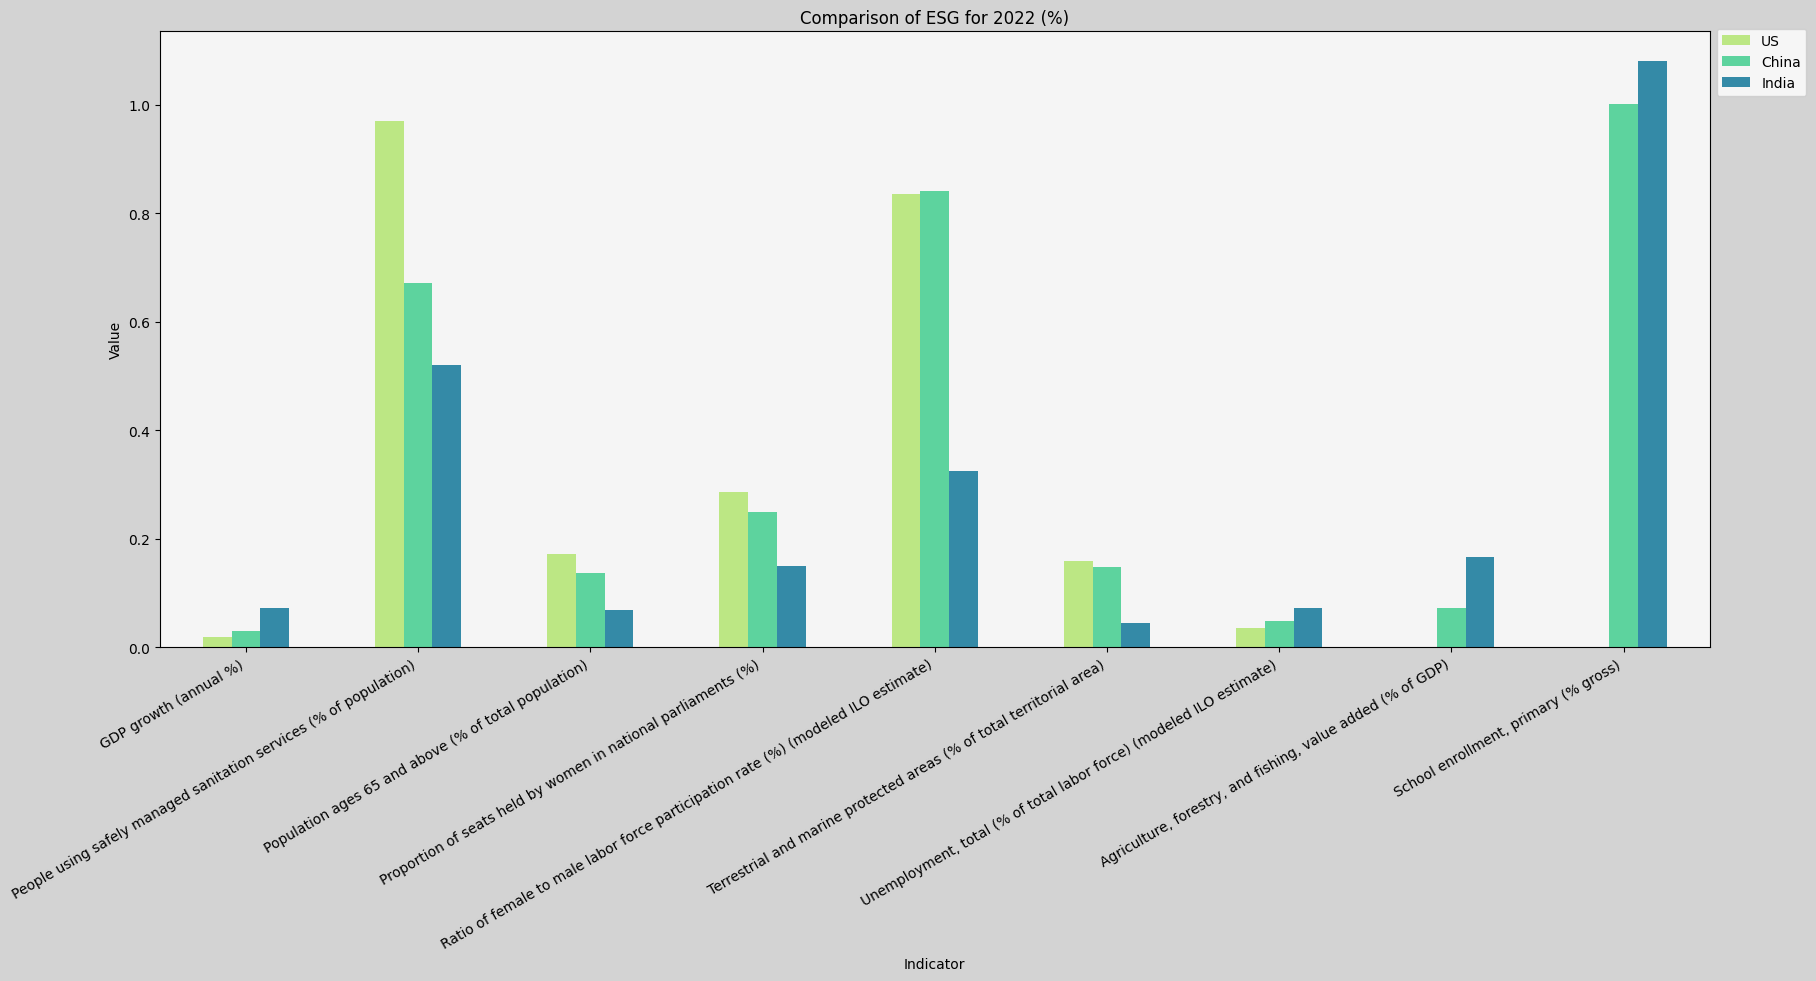

In [13]:
# Function to filter data for specific indicators and year
def filter_indicator_year_data(df, indicators, year, country_name):
    df = df[(df['Year'] == year) & (df['Indicator'].isin(indicators))]
    df['Country'] = country_name
    return df.pivot(index='Indicator', columns='Country', values='Value')
    
indicators = [
    'Agriculture, forestry, and fishing, value added (% of GDP)',
    'Terrestrial and marine protected areas (% of total territorial area)',
    'People using safely managed sanitation services (% of population)',
    'Population ages 65 and above (% of total population)',
    'School enrollment, primary (% gross)',    
    'GDP growth (annual %)',
    'Proportion of seats held by women in national parliaments (%)',
    'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)'
]
year = 2022

# Filter data for the specified indicators and year
us_data = filter_indicator_year_data(data_US, indicators, year, 'US')
china_data = filter_indicator_year_data(data_Ch, indicators, year, 'China')
india_data = filter_indicator_year_data(data_Ind, indicators, year, 'India')

# Combine the data into a single DataFrame for comparison
combined_df = pd.concat([us_data, china_data, india_data], axis=1)

# Plotting the indicators for comparison with countries in different colors
fig, ax = plt.subplots(figsize=(20, 8))
fig.patch.set_facecolor('lightgrey')  # Change the background color of the entire figure
ax.set_facecolor('whitesmoke')
colors = ['#bce784', '#5dd39e', '#348aa7'] 
combined_df.plot(kind='bar', ax=ax,color=colors) 
plt.xlabel('Indicator')
plt.ylabel('Value')
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.title(f'Comparison of ESG for {year} (%)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.95))
plt.show()